## 6.5 Unsupervised Machine Learning - Clustering
### This script contains the following:

#### 1. Importing libraries and data
#### 2. Standadizing the data
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = 'C:/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hap_full_categor.csv'))

In [5]:
df.shape

(1229, 15)

In [6]:
df.head()

,Unnamed: 0,country,region_id,region,Year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,0,Switzerland,WE,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,1,Iceland,WE,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,2,Denmark,WE,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,3,Norway,WE,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
4,4,Canada,NAANZ,North America and ANZ,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,high


#### Data cleaning

In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [8]:
df.shape

(1229, 14)

In [9]:
# check for missing values
df.isnull().sum()

country                        0
region_id                      0
region                         0
Year                           0
happiness_rank                 0
happiness_score                0
economy_GDP_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
happiness_category             0
dtype: int64

In [10]:
# check for duplicates
dups = df.duplicated()

In [11]:
dups.shape

(1229,)

In [12]:
df = df[['happiness_score','economy_GDP_per_capita','family','health_life_expectancy', 'freedom', 
         'trust_government_corruption', 'generosity']]

In [13]:
df

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
1224,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200
1225,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700
1226,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600
1227,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200


In [14]:
df.shape

(1229, 7)

### 2. Standadizing data

In [15]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[ 1.93374377  0.96629718  0.96015916 ...  1.45527919  2.60645391
   0.82358637]
 [ 1.91042476  0.74985002  1.12018331 ...  1.21682497  0.09556911
   2.03231385]
 [ 1.87993068  0.80307134  0.99376059 ...  1.35037229  3.18191951
   1.21006381]
 ...
 [-2.1847514  -0.06666981 -1.04169078 ... -0.72560488 -0.23325549
  -0.82923064]
 [-2.2206268   0.95593327 -1.62447981 ... -2.19002476 -0.87376432
  -1.03715395]
 [-2.71481034 -0.50098887 -3.13608884 ... -2.85743736 -1.1353806
  -0.97650965]]


In [16]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

      happiness_score  economy_GDP_per_capita    family  \
0            1.933744                0.966297  0.960159   
1            1.910425                0.749850  1.120183   
2            1.879931                0.803071  0.993761   
3            1.875446                1.109898  0.903823   
4            1.790242                0.804933  0.878508   
...               ...                     ...       ...   
1224        -1.757834                1.211010 -0.662271   
1225        -1.939902               -0.438943 -2.732386   
1226        -2.184751               -0.066670 -1.041691   
1227        -2.220627                0.955933 -1.624480   
1228        -2.714810               -0.500989 -3.136089   

      health_life_expectancy   freedom  trust_government_corruption  \
0                   1.381801  1.455279                     2.606454   
1                   1.408402  1.216825                     0.095569   
2                   1.104621  1.350372                     3.181920   
3      

### 3. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8602.999999999996,
 -5718.737375984539,
 -4451.124491268014,
 -3989.925326453016,
 -3600.138338030947,
 -3362.256644346572,
 -3168.6715896669857,
 -3021.8585802058265,
 -2865.315021433324]

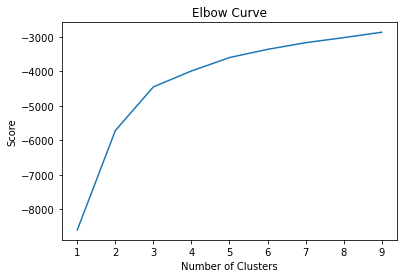

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The line is flatten out on the x-axis after 3. Therefore, the optimal count for clusters is three.

### 4. k-means clustering

In [20]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [22]:
df['clusters'] = kmeans.fit_predict(df)

In [23]:
df.head()

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,clusters
0,1.933744,0.966297,0.960159,1.381801,1.455279,2.606454,0.823586,0
1,1.910425,0.749850,1.120183,1.408402,1.216825,0.095569,2.032314,0
2,1.879931,0.803071,0.993761,1.104621,1.350372,3.181920,1.210064,0
3,1.875446,1.109898,0.903823,1.148487,1.482235,2.112540,1.258579,0
4,1.790242,0.804933,0.878508,1.233230,1.244040,1.792647,2.221264,0


In [24]:
df['clusters'].value_counts()

2    639
1    394
0    196
Name: clusters, dtype: int64

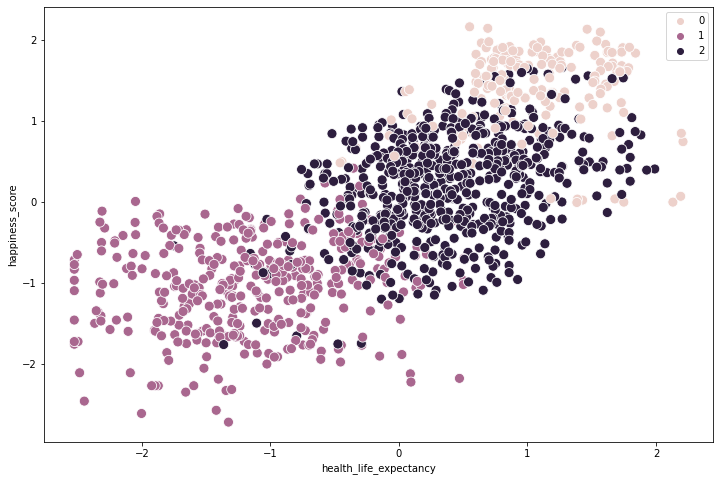

In [25]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['health_life_expectancy'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('health_life_expectancy') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

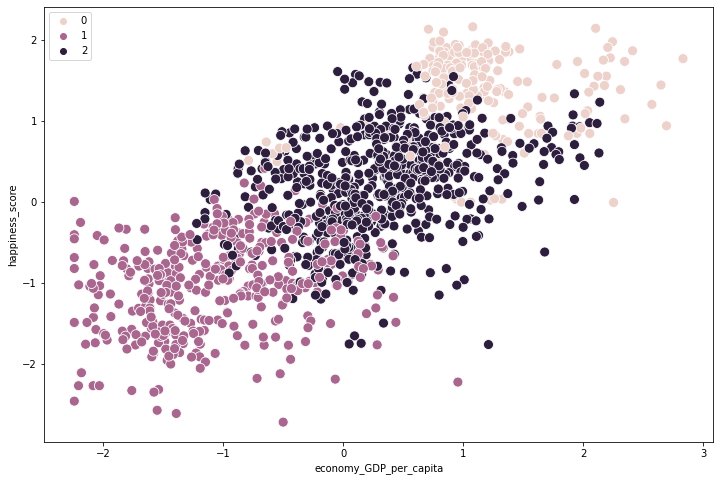

In [26]:
# Plot the clusters for the "happiness_score" and "economy_GDP_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['economy_GDP_per_capita'], y=df['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('economy_GDP_per_capita') 
plt.ylabel('happiness_score') 
plt.show()

#### The grapgh shows the same pattern as between variables health life expectancy and happiness score. GDP per capita has the same positive correlation with the happiness score. The higher GDP the higher happiness score. 

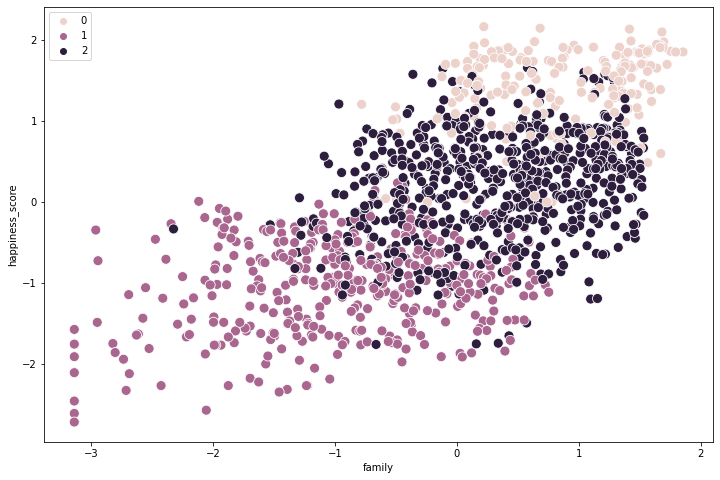

In [27]:
# Plot the clusters for the "happiness_score" and "family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['family'], y=df['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('family') 
plt.ylabel('happiness_score') 
plt.show()

#### The positive correlation is visible between the variables, however, family tends to be spreaded with the less score and more dense with the higher score countries.

In [28]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
df.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'economy_GDP_per_capita':['mean', 'median'], 
                         'family':['mean', 'median'],
                          'health_life_expectancy':['mean', 'median'],
                          'freedom':['mean', 'median'],
                          'trust_government_corruption':['mean', 'median'],
                          'generosity':['mean', 'median']})

happiness_score           economy_GDP_per_capita            \
                       mean    median                   mean    median   
cluster                                                                  
dark purple        0.215413  0.289754               0.304996  0.289065   
pink               1.377434  1.469965               1.139124  1.075431   
purple            -1.034583 -0.982477              -1.061322 -1.130843   

               family           health_life_expectancy             freedom  \
                 mean    median                   mean    median      mean   
cluster                                                                      
dark purple  0.333302  0.384928               0.386001  0.364882  0.024309   
pink         0.813741  0.817512               0.997719  0.930093  1.041288   
purple      -0.945363 -0.886678              -1.122355 -1.135410 -0.557426   

                      trust_government_corruption           generosity  \
               median                        mean    median       mean   
cluster                                                                  
dark purple  0.149159                   -0.399987 -0.512914  -0.384070   
pink         1.090720                    1.654878  1.657842   0.823948   
purple      -0.388659                   -0.174529 -0.344998   0.213013   

                       
               median  
cluster                
dark purple -0.552000  
pink         0.704988  
purple       0.057072

#### The data shows that there is a positive correlation between happiness score and other columns. The pink cluster returned best stats. The median number of all variables are the highest and significantly larger than the other clusters. These are the countries with the highest numbers of GDP, Life expectancy and social support that make up the highest mean and median of hapiness score. 
#### This analysis has given more insights into the need to explore further the each cluster to discover how people perceive happiness by countries/continents.

### Clusters:
#### pink (cluster 0) is composed of countries having high level of happiness score and high GDP & life expectancy level as well as high perception of freedom, trust and generosity
#### dark purple (cluster 1) is composed of countries having middle happiness score: middle GDP & life expectancy level as well as middle level of freedom, trust and generosity perception
####  purple (cluster 2) is composed of countries having low happiness score and low GDP & life expectancy level as well as low perception of freedom, trust and generosity